# TF-Modisco Workflow for a single task on CTCFL 
This notebook uses the modisco package to extract motifs for CTCFL from DeepSEA model.
Tutorials and documentations can be found here: https://github.com/kundajelab/tfmodisco 

In [1]:
# Select Environment(conda_kipoi-shared__env__kipoi-py3-keras2)
import os
import sys
import time
import h5py
import torch
import scipy.io
import numpy as np
from collections import Counter
from collections import OrderedDict
import seaborn as sns
import matplotlib.pyplot as plt

# kipoi
import kipoi
import kipoi_interpret
from kipoi_veff.utils.plot import seqlogo_heatmap

# Gradient-based methods
from kipoi_interpret.importance_scores.gradient import Gradient, GradientXInput
from kipoi_interpret.importance_scores.referencebased import DeepLift

# tf-modisco
import modisco
import modisco.visualization
from modisco.visualization import viz_sequence

# tf-modisco workflow
import modisco.backend
import modisco.nearest_neighbors
import modisco.affinitymat
import modisco.affinitymat.core
import modisco.tfmodisco_workflow.seqlets_to_patterns
import modisco.tfmodisco_workflow.workflow
import modisco.tfmodisco_workflow
import modisco.aggregator
import modisco.cluster
import modisco.cluster.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.value_provider
import modisco.core
import modisco.coordproducers
import modisco.metaclusterers
import modisco.clusterinit.memeinit
import modisco.util

/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/kipoi_veff/external/concise/seqplotting_deps.py:34: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  min_coords = np.vstack(data.min(0) for data in polygons_data).min(0)
/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/kipoi_veff/external/concise/seqplotting_deps.py:35: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  max_coords = np.vstack(data.max(0) for data in polygons_data).max(0)
TF-MoDISco is using the TensorFlow backend.
/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/ten

In [2]:
### set the path
data_dir = '../../../data/deepsea_train/'
result_dir = '../../../out/importance scores/DeepSea/'

### Import data and pre-computed importance scores

In [3]:
with open(data_dir + 'X_test_sample.npy', 'rb') as f:
    X_test_sample = np.load(f)
X_test_sample = X_test_sample.squeeze().transpose((0, 2, 1))

In [4]:
print(X_test_sample.shape)

(10000, 1000, 4)


In [5]:
scores = OrderedDict()
hypothetical_scores = OrderedDict()
tasks = ['CTCFL']
path = '../../../out/importance scores/DeepSea/'

with open(path + 'CTCFL_scores.npy', 'rb') as f:
    scores[tasks[0]] = np.load(f) 
with open(path + 'CTCFL_hyp_scores.npy', 'rb') as f:
    hypothetical_scores[tasks[0]] = np.load(f) 


### Single-task TF-MoDISco for CTCFL

MEMORY 1.19443456
On task CTCFL
Computing windowed sums on original
Generating null dist
peak(mu)= -0.018395139910280703
Computing threshold
Thresholds from null dist were -2.2473408952355385  and  0.9587460700422525
Passing windows frac was 0.024546348884381338 , which is below  0.03 ; adjusting
Final raw thresholds are -1.542136504631487  and  1.542136504631487
Final transformed thresholds are -0.97  and  0.97


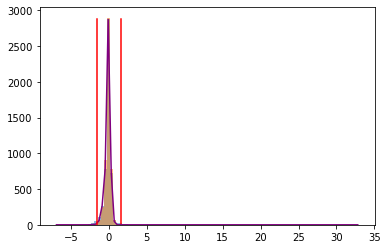

Got 35258 coords
After resolving overlaps, got 35258 seqlets
Across all tasks, the weakest transformed threshold used was: 0.9699
MEMORY 1.735315456
35258 identified in total
min_metacluster_size_frac * len(seqlets) = 352 is more than min_metacluster_size=100.
Using it as a new min_metacluster_size
2 activity patterns with support >= 352 out of 2 possible patterns
Metacluster sizes:  [24374, 10884]
Idx to activities:  {0: '-1', 1: '1'}
MEMORY 1.736040448
On metacluster 1
Metacluster size 10884
Relevant tasks:  ('CTCFL',)
Relevant signs:  (1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 10884
(Round 1) Computing coarse affmat
MEMORY 1.736040448
Beginning embedding computation
Computing embeddings


Using TensorFlow backend.


Finished embedding computation in 3.4 s
Starting affinity matrix computations
Normalization computed in 0.22 s
Cosine similarity mat computed in 1.28 s
Normalization computed in 0.22 s
Cosine similarity mat computed in 1.29 s
Finished affinity matrix computations in 4.51 s
(Round 1) Compute nearest neighbors from coarse affmat
MEMORY 2.44314112
Computed nearest neighbors in 10.27 s
MEMORY 2.576601088
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 2.576601088
Launching nearest neighbors affmat calculation job
MEMORY 2.57732608
Parallel runs completed
MEMORY 2.686787584
Job completed in: 85.22 s
MEMORY 3.632959488
Launching nearest neighbors affmat calculation job
MEMORY 3.631890432
Parallel runs completed
MEMORY 3.697229824
Job completed in: 84.92 s
MEMORY 4.643131392
(Round 1) Computed affinity matrix on nearest neighbors in 173.65 s
MEMORY 3.697410048
Filtered down to 7309 of 10884
(Round 1) Retained 7309 rows out of 10884 after filtering
MEMORY 3.697631232
(Round 1) 

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.8066499088959961


  2%|▏         | 1/50 [00:01<00:53,  1.08s/it]

Quality: 0.8080506759523627


 10%|█         | 5/50 [00:06<01:00,  1.35s/it]

Quality: 0.8096418460179723


 12%|█▏        | 6/50 [00:08<00:58,  1.33s/it]

Quality: 0.8103645442807461


100%|██████████| 50/50 [00:55<00:00,  1.11s/it]

Got 20 clusters after round 1
Counts:
{6: 443, 5: 565, 8: 384, 7: 421, 9: 373, 1: 761, 4: 576, 0: 876, 18: 13, 2: 651, 19: 5, 3: 612, 12: 225, 13: 213, 11: 342, 10: 355, 15: 180, 14: 212, 17: 19, 16: 83}
MEMORY 2.277789696
(Round 1) Aggregating seqlets in each cluster
MEMORY 2.277789696
Aggregating for cluster 0 with 876 seqlets
MEMORY 2.277789696


Trimming eliminated 0 seqlets out of 876
Removed 21 duplicate seqlets
Aggregating for cluster 1 with 761 seqlets
MEMORY 2.284859392
Trimming eliminated 0 seqlets out of 761
Removed 6 duplicate seqlets
Aggregating for cluster 2 with 651 seqlets
MEMORY 2.285666304
Trimming eliminated 0 seqlets out of 651
Removed 10 duplicate seqlets
Aggregating for cluster 3 with 612 seqlets
MEMORY 2.286678016
Trimming eliminated 0 seqlets out of 612
Removed 5 duplicate seqlets
Aggregating for cluster 4 with 576 seqlets
MEMORY 2.287726592
Trimming eliminated 0 seqlets out of 576
Removed 2 duplicate seqlets
Aggregating for cluster 5 with 565 seqlets
MEMORY 2.288787456
Trimming eliminated 0 seqlets out of 565
Removed 1 duplicate seqlets
Aggregating for cluster 6 with 443 seqlets
MEMORY 2.290098176
Trimming eliminated 0 seqlets out of 443
Aggregating for cluster 7 with 421 seqlets
MEMORY 2.290368512
Trimming eliminated 0 seqlets out of 421
Removed 2 duplicate seqlets
Aggregating for cluster 8 with 384 seqle

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7867745483958751


  4%|▍         | 2/50 [00:03<01:10,  1.46s/it]

Quality: 0.7875409192630961


 22%|██▏       | 11/50 [00:15<00:50,  1.30s/it]

Quality: 0.7875954397054562


 84%|████████▍ | 42/50 [00:54<00:10,  1.27s/it]

Quality: 0.7878627690871808


100%|██████████| 50/50 [01:05<00:00,  1.31s/it]

Got 20 clusters after round 2
Counts:
{0: 1166, 3: 600, 4: 499, 5: 456, 10: 326, 7: 442, 1: 780, 8: 351, 16: 61, 6: 449, 2: 736, 14: 174, 12: 216, 9: 340, 11: 295, 17: 37, 13: 208, 19: 6, 18: 22, 15: 83}
MEMORY 2.293669888
(Round 2) Aggregating seqlets in each cluster
MEMORY 2.293669888
Aggregating for cluster 0 with 1166 seqlets
MEMORY 2.293669888


Trimming eliminated 0 seqlets out of 1166
Removed 3 duplicate seqlets
Aggregating for cluster 1 with 780 seqlets
MEMORY 2.300776448
Trimming eliminated 0 seqlets out of 780
Removed 7 duplicate seqlets
Aggregating for cluster 2 with 736 seqlets
MEMORY 2.300776448
Trimming eliminated 0 seqlets out of 736
Aggregating for cluster 3 with 600 seqlets
MEMORY 2.303205376
Trimming eliminated 0 seqlets out of 600
Removed 3 duplicate seqlets
Aggregating for cluster 4 with 499 seqlets
MEMORY 2.303205376
Trimming eliminated 0 seqlets out of 499
Removed 2 duplicate seqlets
Aggregating for cluster 5 with 456 seqlets
MEMORY 2.303475712
Trimming eliminated 0 seqlets out of 456
Removed 6 duplicate seqlets
Aggregating for cluster 6 with 449 seqlets
MEMORY 2.30428672
Trimming eliminated 0 seqlets out of 449
Removed 12 duplicate seqlets
Aggregating for cluster 7 with 442 seqlets
MEMORY 2.305368064
Trimming eliminated 0 seqlets out of 442
Removed 9 duplicate seqlets
Aggregating for cluster 8 with 351 seqlet

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7856585084444699


  4%|▍         | 2/50 [00:04<01:49,  2.28s/it]

Quality: 0.7866424553092104


  6%|▌         | 3/50 [00:06<01:46,  2.27s/it]

Quality: 0.7871502043218839


  8%|▊         | 4/50 [00:09<01:46,  2.32s/it]

Quality: 0.7875570137073822


 12%|█▏        | 6/50 [00:12<01:24,  1.92s/it]

Quality: 0.7876948676754905


 18%|█▊        | 9/50 [00:18<01:23,  2.03s/it]

Quality: 0.7883785264029963


 72%|███████▏  | 36/50 [01:15<00:28,  2.05s/it]

Quality: 0.7885324018154283


100%|██████████| 50/50 [01:44<00:00,  2.09s/it]

Got 21 clusters after round 1
Counts:
{17: 107, 11: 242, 13: 219, 14: 194, 12: 224, 10: 270, 9: 283, 7: 688, 0: 1382, 1: 1238, 6: 691, 2: 1020, 3: 1000, 16: 115, 4: 836, 18: 103, 15: 191, 8: 543, 19: 46, 5: 787, 20: 21}
MEMORY 2.789208064
(Round 1) Aggregating seqlets in each cluster
MEMORY 2.789208064
Aggregating for cluster 0 with 1382 seqlets
MEMORY 2.789208064


Trimming eliminated 0 seqlets out of 1382
Removed 8 duplicate seqlets
Aggregating for cluster 1 with 1238 seqlets
MEMORY 2.800218112
Trimming eliminated 0 seqlets out of 1238
Removed 2 duplicate seqlets
Aggregating for cluster 2 with 1020 seqlets
MEMORY 2.802733056
Trimming eliminated 0 seqlets out of 1020
Removed 7 duplicate seqlets
Aggregating for cluster 3 with 1000 seqlets
MEMORY 2.803646464
Trimming eliminated 0 seqlets out of 1000
Removed 1 duplicate seqlets
Aggregating for cluster 4 with 836 seqlets
MEMORY 2.805792768
Trimming eliminated 0 seqlets out of 836
Removed 1 duplicate seqlets
Aggregating for cluster 5 with 787 seqlets
MEMORY 2.806788096
Trimming eliminated 0 seqlets out of 787
Removed 6 duplicate seqlets
Aggregating for cluster 6 with 691 seqlets
MEMORY 2.808147968
Trimming eliminated 0 seqlets out of 691
Removed 2 duplicate seqlets
Aggregating for cluster 7 with 688 seqlets
MEMORY 2.809434112
Trimming eliminated 0 seqlets out of 688
Removed 5 duplicate seqlets
Aggrega

  0%|          | 0/50 [00:00<?, ?it/s]

Quality: 0.7521845279056228


 10%|█         | 5/50 [00:07<01:04,  1.44s/it]

Quality: 0.7541047565436163


 50%|█████     | 25/50 [00:44<00:43,  1.75s/it]

Quality: 0.7544880708139404


100%|██████████| 50/50 [01:24<00:00,  1.69s/it]

Got 19 clusters after round 2
Counts:
{9: 287, 7: 691, 12: 53, 1: 1191, 6: 692, 4: 801, 2: 980, 3: 826, 8: 534, 14: 27, 15: 13, 18: 2, 0: 1380, 10: 186, 5: 793, 11: 75, 17: 2, 16: 13, 13: 31}
MEMORY 2.692866048
(Round 2) Aggregating seqlets in each cluster
MEMORY 2.692866048
Aggregating for cluster 0 with 1380 seqlets
MEMORY 2.692866048


Trimming eliminated 0 seqlets out of 1380
Removed 8 duplicate seqlets
Aggregating for cluster 1 with 1191 seqlets
MEMORY 2.701254656
Trimming eliminated 0 seqlets out of 1191
Removed 4 duplicate seqlets
Aggregating for cluster 2 with 980 seqlets
MEMORY 2.702036992
Trimming eliminated 0 seqlets out of 980
Removed 8 duplicate seqlets
Aggregating for cluster 3 with 826 seqlets
MEMORY 2.704924672
Trimming eliminated 0 seqlets out of 826
Removed 6 duplicate seqlets
Aggregating for cluster 4 with 801 seqlets
MEMORY 2.704924672
Trimming eliminated 0 seqlets out of 801
Removed 5 duplicate seqlets
Aggregating for cluster 5 with 793 seqlets
MEMORY 2.706505728
Trimming eliminated 0 seqlets out of 793
Removed 5 duplicate seqlets
Aggregating for cluster 6 with 692 seqlets
MEMORY 2.709368832
Trimming eliminated 0 seqlets out of 692
Removed 3 duplicate seqlets
Aggregating for cluster 7 with 691 seqlets
MEMORY 2.709368832
Trimming eliminated 0 seqlets out of 691
Removed 3 duplicate seqlets
Aggregating

In [6]:
null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)
tfmodisco_results = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    sliding_window_size = 15,
    flank_size = 5,
    target_seqlet_fdr = 0.15,
    seqlets_to_patterns_factory = modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
#         initclusterer_factory=modisco.clusterinit.memeinit.MemeInitClustererFactory(
#             #meme_command="meme", base_outdir="meme_out",   
#             #max_num_seqlets_to_use specifies the maximum number of seqlets to use
#             # with MEME (this is to speed up MEME in the cases where the number of seqlets is
#             #  very large)
#             max_num_seqlets_to_use=10000,
#             nmotifs=10,
#             n_jobs=4),
        #use_louvain=False,
        #Adjust trim_to_window_size and initial_flank_to_add
        # according to how big you expect
        # the core motif to be; default value is 10
        #trim_to_window_size=6,
        #initial_flank_to_add=2,
        #final_flank_to_add=5,
        #kmer_len, num_gaps and num_mismatches are used to
        # derive kmer embeddings for coarse-grained affinity
        # matrix calculation. kmer_len=6, num_gaps=1
        # and num_mismatches=0 means
        # that kmer embeddings using 6-mers with 1 gap will be
        # used.
        trim_to_window_size=15,
        initial_flank_to_add=5,
        kmer_len=5,
        num_gaps=1,
        num_mismatches=0,
        final_min_cluster_size=60))(
    #There is only one task, so we just call this 'task0'
    task_names = tasks,
    contrib_scores = scores,                
    hypothetical_contribs = hypothetical_scores,
    one_hot = X_test_sample,
    null_per_pos_scores=null_per_pos_scores)

### Save results for future use

In [7]:
grp = h5py.File('../../../out/modisco/CTCFL_deepsea_modisco.hdf5')
tfmodisco_results.save_hdf5(grp)

### Analyze results

#### I. Metaclustering Heatmap

Metaclusters heatmap
(35258, 1)


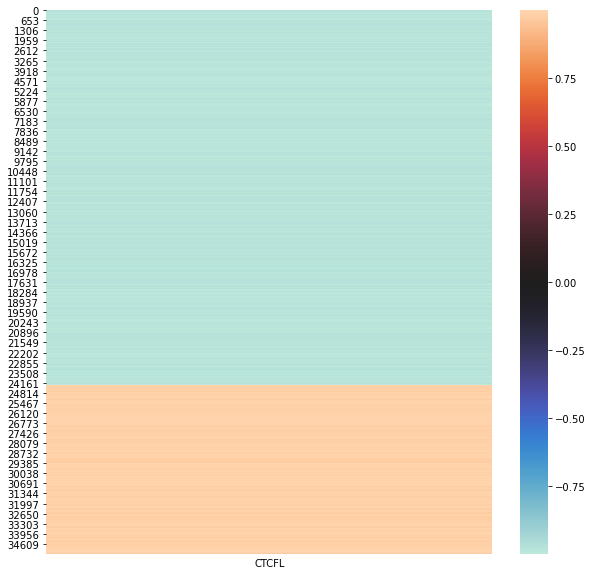

In [19]:
hdf5_results = h5py.File("../../../out/modisco/CTCFL_deepsea_modisco.hdf5","r")
figure_dir = '../../out/figures/'

### heatmap
print("Metaclusters heatmap")
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[np.array([x[0] for x in sorted(enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
print(activity_patterns.shape)


plt.figure(figsize=(10,10))
sns.heatmap(activity_patterns, center=0, xticklabels = False)
plt.xlabel("CTCFL") 
# plt.show()
#plt.savefig(figure_dir + 'ctcfl_heatmap.png', bbox_inches = "tight", dpi = 1200)

In [9]:
# pritn metacluster names
metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]
metacluster_names

['metacluster_0', 'metacluster_1']

#### II. Trim and plot learned motifs

In [13]:
from modisco.tfmodisco_workflow import workflow

track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(task_names=tasks,
                                                               contrib_scores=scores,
                                                               hypothetical_contribs=hypothetical_scores,
                                                               one_hot=X_test_sample)

loaded_tfmodisco_results = workflow.TfModiscoResults.from_hdf5(hdf5_results, track_set=track_set)

metacluster_0 0
Removed 1 duplicate seqlets


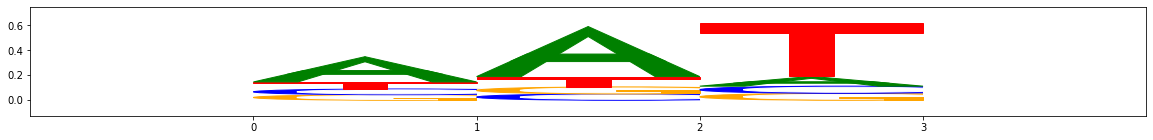

metacluster_0 1


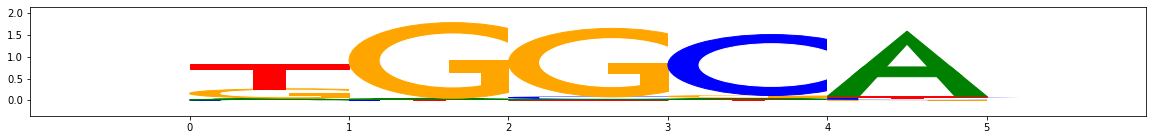

metacluster_0 2


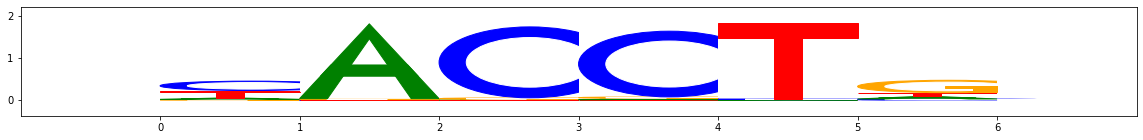

metacluster_0 3


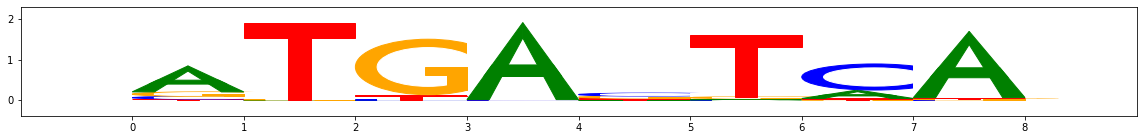

metacluster_0 4


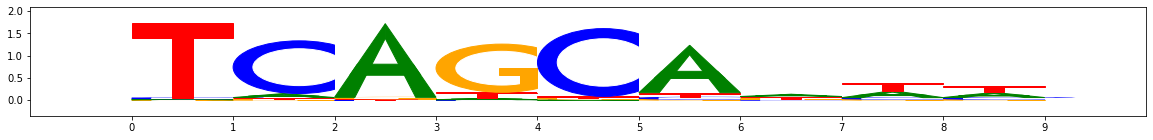

metacluster_0 5


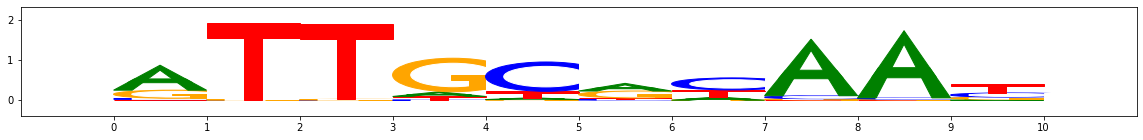

metacluster_0 6


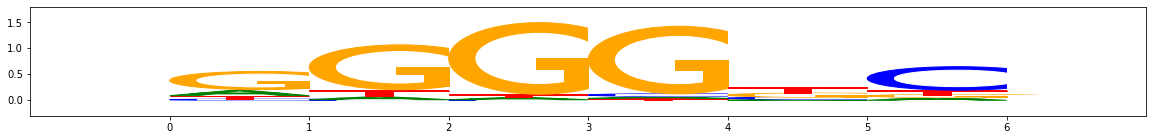

metacluster_0 7


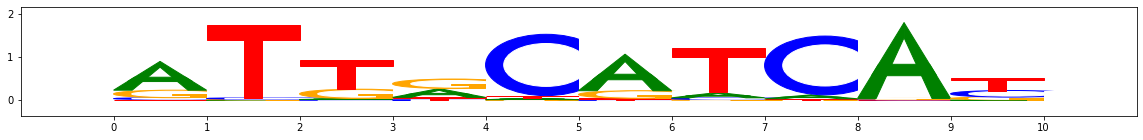

metacluster_0 8


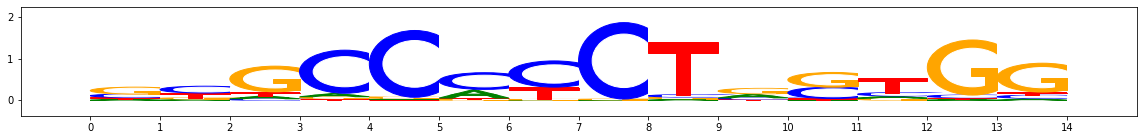

metacluster_0 9


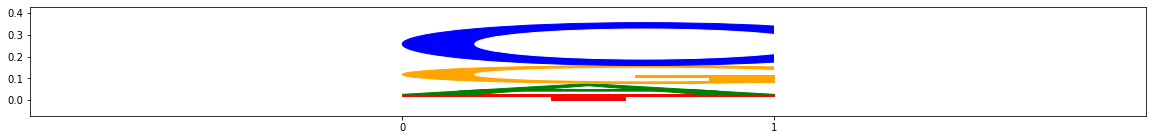

metacluster_0 10


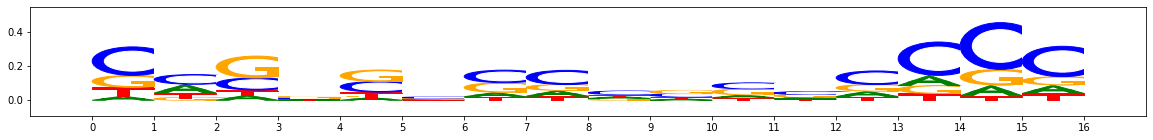

metacluster_0 11


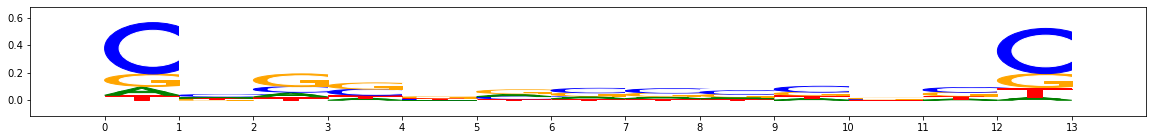

metacluster_1 0


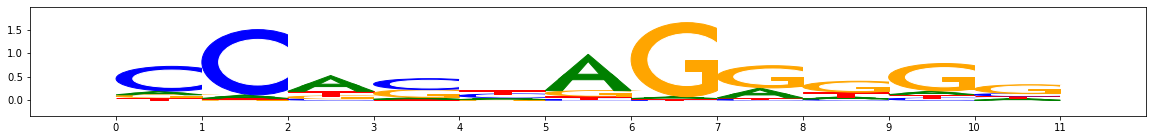

metacluster_1 1


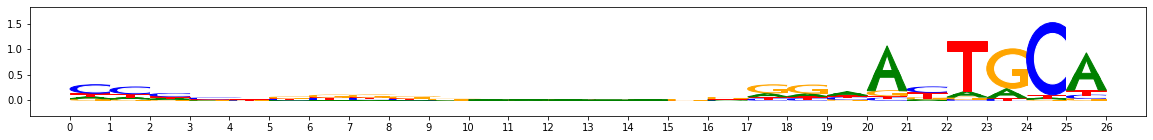

metacluster_1 2


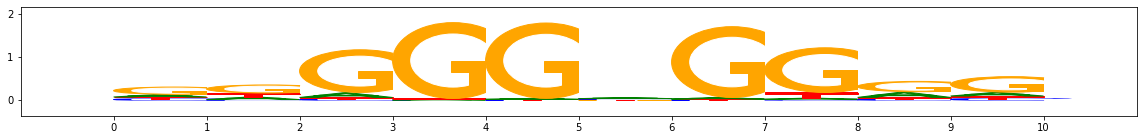

metacluster_1 3


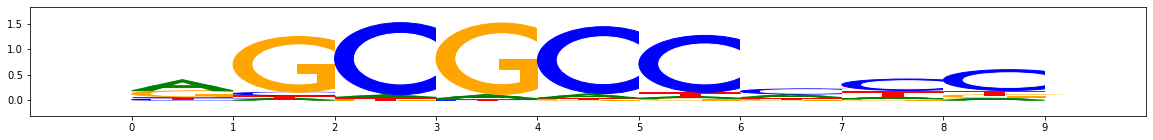

metacluster_1 4


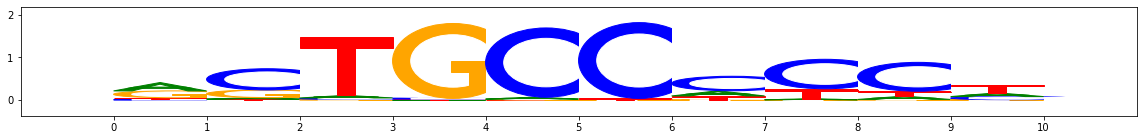

metacluster_1 5


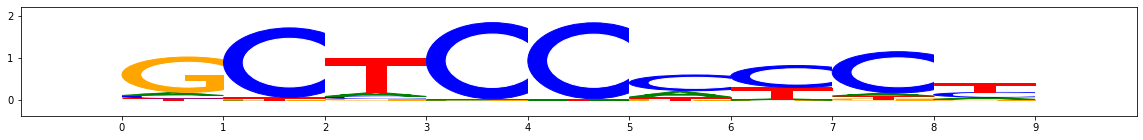

metacluster_1 6


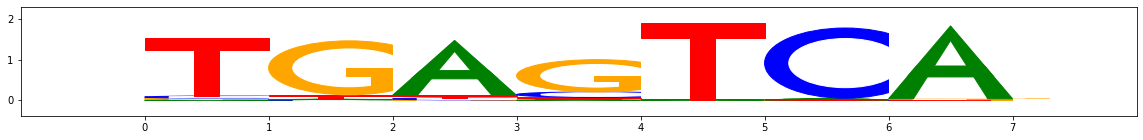

metacluster_1 7


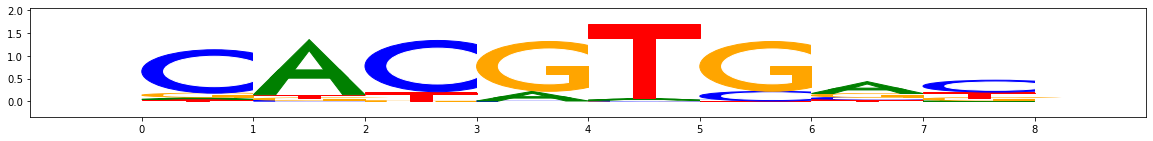

metacluster_1 8


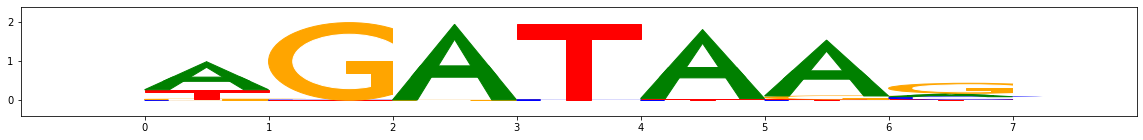

metacluster_1 9


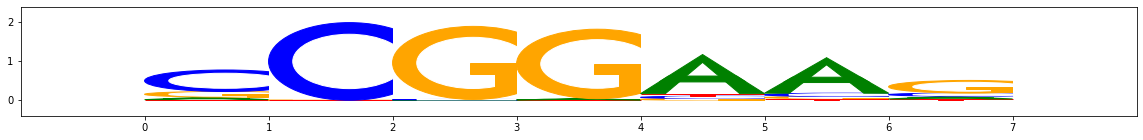

metacluster_1 10


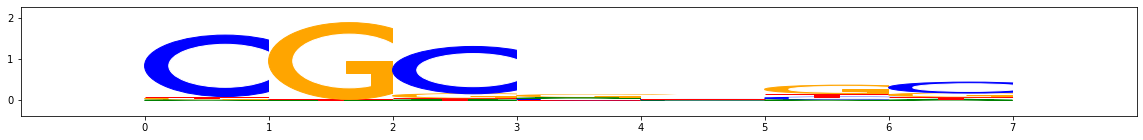

metacluster_1 11


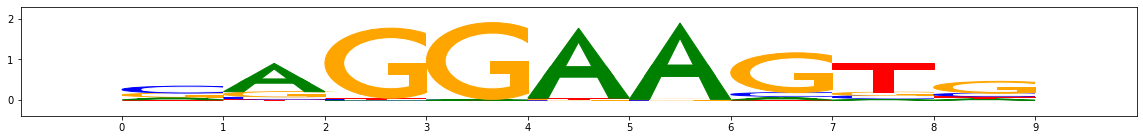

metacluster_1 12


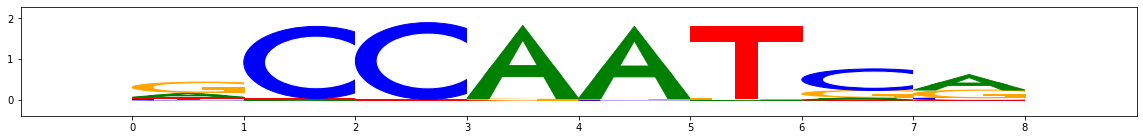

metacluster_1 13


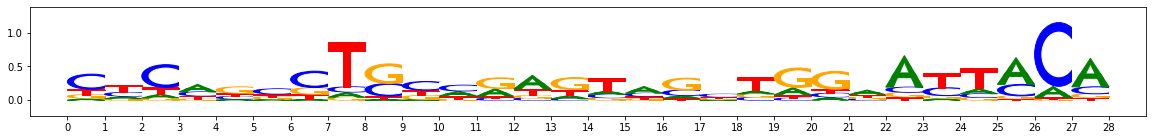

metacluster_1 14


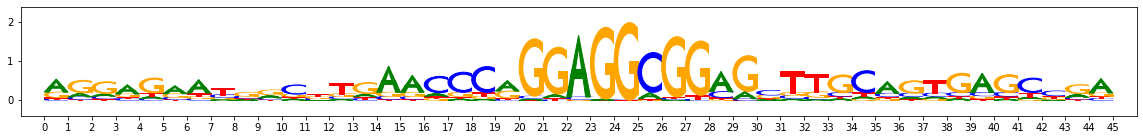

In [18]:
final_results = []
for metacluster_name in metacluster_names:
    n_patterns = len(loaded_tfmodisco_results.metacluster_idx_to_submetacluster_results[metacluster_name].seqlets_to_patterns_result.patterns)
        
    for pattern_name in range(n_patterns):
        print(metacluster_name, pattern_name)
        
        untrimmed_pattern = (loaded_tfmodisco_results.metacluster_idx_to_submetacluster_results[metacluster_name].seqlets_to_patterns_result.patterns[pattern_name])
        
        background = np.array([0.27, 0.23, 0.23, 0.27])
    
        trimmed_gata = untrimmed_pattern.trim_by_ic(ppm_track_name="sequence", background=background, threshold=0.3)
        scaled = viz_sequence.ic_scale(trimmed_gata["sequence"].fwd, background=background)
        final_results.append(scaled)
  
        viz_sequence.plot_weights(scaled)

In [16]:
np.save('../../../out/CTCFL_modisco_pwm', final_results)

/home/ubuntu/anaconda3/envs/kipoi-shared__envs__kipoi-py3-keras2/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
